In [6]:
# Dependencies
import pandas as pd
from pathlib import Path

In [14]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
# city_data_df = pd.read_csv("../WeatherPY/output_data/cities.csv")
obesity_df = pd.read_csv('Resources/500_Cities__Obesity_among_adults_aged___18_years_20231109.csv', encoding= 'ISO-8859-1')
income_df = pd.read_csv('Resources/kaggle_income.csv', encoding='ISO-8859-1')



In [15]:
# Display sample obesity data
obesity_df.head(2)

,ï»¿Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,633000,Obesity among adults aged >=18 Years,%,...,24.4,NaN,NaN,"144,186","(37.6329591551, -122.077051051)",UNHBEH,OBESITY,633000.0,NaN,Obesity
1,2017,CA,California,Lakewood,City,BRFSS,Unhealthy Behaviors,639892,Obesity among adults aged >=18 Years,%,...,22.2,NaN,NaN,"80,048","(33.8470531941, -118.122204765)",UNHBEH,OBESITY,639892.0,NaN,Obesity


In [105]:
# Display sample income data
income_df.head(2)

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685


In [110]:
#cleaning of income 

cleaned_income_df = income_df.drop(['id', 'State_Code','State_ab','County','Place','Type', 'Primary',
                                     'Area_Code','ALand','AWater','Median', 'Stdev','sum_w'], axis=1)


cleaned_income_df


,State_Name,City,Zip_Code,Lat,Lon,Mean
0,Alabama,Chickasaw,36611,30.771450,-88.079697,38773
1,Alabama,Louisville,36048,31.708516,-85.611039,37725
2,Alabama,Columbiana,35051,33.191452,-86.615618,54606
3,Alabama,Satsuma,36572,30.874343,-88.009442,63919
4,Alabama,Dauphin Island,36528,30.250913,-88.171268,77948
...,...,...,...,...,...,...
32521,Puerto Rico,Guaynabo,970,18.397925,-66.130633,30649
32522,Puerto Rico,Aguada,602,18.385424,-67.203310,15520
32523,Puerto Rico,Aguada,602,18.356565,-67.180686,41933
32524,Puerto Rico,Aguada,602,18.412041,-67.213413,0


In [121]:
# Remove Dup Zip Codes
cleaned_income_df = cleaned_income_df.drop_duplicates(subset='Zip_Code', keep="first")
cleaned_income_df


,State_Name,City,Zip_Code,Lat,Lon,Mean
0,Alabama,Chickasaw,36611,30.771450,-88.079697,38773
1,Alabama,Louisville,36048,31.708516,-85.611039,37725
2,Alabama,Columbiana,35051,33.191452,-86.615618,54606
3,Alabama,Satsuma,36572,30.874343,-88.009442,63919
4,Alabama,Dauphin Island,36528,30.250913,-88.171268,77948
...,...,...,...,...,...,...
32459,Puerto Rico,Caguas,726,18.245952,-65.999500,69133
32471,Puerto Rico,Maricao,606,18.192187,-66.980897,19194
32481,Puerto Rico,Adjuntas,601,18.155582,-66.701046,24000
32482,Puerto Rico,Ponce,733,18.003187,-66.637715,28457


In [122]:
#cleaned_income__grouped = cleaned_income_df.groupby('City')['Mean'].mean()
#city_income_df = cleaned_income_df.groupby(['State_Name','City'])['Mean'].mean()
city_income_df = cleaned_income_df.groupby(['State_Name','City','Lat','Lon'])['Mean'].mean()

# create the new data frame group by state and city 
grouped_city_income_df = pd.DataFrame(city_income_df)

# display new df
grouped_city_income_df

Mean
State_Name City        Lat       Lon                  
Alabama    Abbeville   31.564689 -85.259124    40518.0
           Adamsville  33.576445 -86.967388    53383.0
           Alabaster   33.253529 -86.808405    47515.0
           Albertville 34.255862 -86.277642    32765.0
                       34.268456 -86.149905    61634.0
...                                                ...
Wyoming    Upton       43.984885 -104.426927   69215.0
           Wamsutter   41.621985 -108.404046       0.0
           Wheatland   42.053464 -104.907886  127999.0
           Worland     44.014369 -107.956379   61427.0
           Wright      43.887727 -105.551902   98281.0

[14803 rows x 1 columns]

In [ ]:
# foreloop to calc the avg of each city


In [59]:
# Preview of the DataFrame
obesity_df.head(2)

,ï»¿Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,633000,Obesity among adults aged >=18 Years,%,...,24.4,NaN,NaN,"144,186","(37.6329591551, -122.077051051)",UNHBEH,OBESITY,633000.0,NaN,Obesity
1,2017,CA,California,Lakewood,City,BRFSS,Unhealthy Behaviors,639892,Obesity among adults aged >=18 Years,%,...,22.2,NaN,NaN,"80,048","(33.8470531941, -118.122204765)",UNHBEH,OBESITY,639892.0,NaN,Obesity


In [159]:
#cleaning obesity df to make more readable
cleaned_obesity_df = obesity_df.drop(['StateAbbr','GeographicLevel', 'DataSource', 'Category', 
                                      'UniqueID','Measure','Data_Value_Unit',
                                      'DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol',
                                      'Data_Value_Footnote','CategoryID','MeasureId','TractFIPS','CityFIPS','Short_Question_Text'], axis=1)


cleaned_obesity_df

,ï»¿Year,StateDesc,CityName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation
0,2017,California,Hayward,24.2,24.1,24.4,"144,186","(37.6329591551, -122.077051051)"
1,2017,California,Lakewood,22.1,21.9,22.2,"80,048","(33.8470531941, -118.122204765)"
2,2017,Alabama,Huntsville,30.3,29.2,31.5,"2,654","(34.7636374497, -86.7500225775)"
3,2017,Alabama,Mobile,38.2,38.0,38.3,"195,111","(30.6776248648, -88.1184482714)"
4,2017,Arizona,Avondale,30.6,29.6,31.5,"3,978","(33.4505348518, -112.292540729)"
...,...,...,...,...,...,...,...,...
29001,2017,Washington,Vancouver,33.8,32.5,35.0,"5,941","(45.6216074971, -122.512559914)"
29002,2017,Wisconsin,Milwaukee,33.0,31.8,34.2,"1,667","(43.0232614948, -87.9135337878)"
29003,2017,Washington,Spokane,33.9,33.0,34.6,"4,654","(47.7077072768, -117.370950018)"
29004,2017,Wisconsin,Milwaukee,29.7,28.4,30.9,"1,920","(43.0789228818, -88.012427277)"


In [160]:
#figure out what type of format is GeoLocation for the split
cleaned_obesity_df['GeoLocation'].info

<bound method Series.info of 0        (37.6329591551, -122.077051051)
1        (33.8470531941, -118.122204765)
2        (34.7636374497, -86.7500225775)
3        (30.6776248648, -88.1184482714)
4        (33.4505348518, -112.292540729)
                      ...               
29001    (45.6216074971, -122.512559914)
29002    (43.0232614948, -87.9135337878)
29003    (47.7077072768, -117.370950018)
29004     (43.0789228818, -88.012427277)
29005    (47.6224618575, -117.368913042)
Name: GeoLocation, Length: 29006, dtype: object>

In [166]:
#split GeoLocation into 2 columns 'lat' and 'Lon'
cleaned_obesity_df[['Lat', 'Lon']] = cleaned_obesity_df['GeoLocation'].str.split(', ', expand=True)
cleaned_obesity_df

,ï»¿Year,State_Name,City,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation,Lat,Lon
0,2017,California,Hayward,24.2,24.1,24.4,"144,186","(37.6329591551, -122.077051051)",(37.6329591551,-122.077051051)
1,2017,California,Lakewood,22.1,21.9,22.2,"80,048","(33.8470531941, -118.122204765)",(33.8470531941,-118.122204765)
2,2017,Alabama,Huntsville,30.3,29.2,31.5,"2,654","(34.7636374497, -86.7500225775)",(34.7636374497,-86.7500225775)
3,2017,Alabama,Mobile,38.2,38.0,38.3,"195,111","(30.6776248648, -88.1184482714)",(30.6776248648,-88.1184482714)
4,2017,Arizona,Avondale,30.6,29.6,31.5,"3,978","(33.4505348518, -112.292540729)",(33.4505348518,-112.292540729)
...,...,...,...,...,...,...,...,...,...,...
29001,2017,Washington,Vancouver,33.8,32.5,35.0,"5,941","(45.6216074971, -122.512559914)",(45.6216074971,-122.512559914)
29002,2017,Wisconsin,Milwaukee,33.0,31.8,34.2,"1,667","(43.0232614948, -87.9135337878)",(43.0232614948,-87.9135337878)
29003,2017,Washington,Spokane,33.9,33.0,34.6,"4,654","(47.7077072768, -117.370950018)",(47.7077072768,-117.370950018)
29004,2017,Wisconsin,Milwaukee,29.7,28.4,30.9,"1,920","(43.0789228818, -88.012427277)",(43.0789228818,-88.012427277)


In [167]:
cleaned_obesity_df.rename(columns = {'CityName':'City','StateDesc':'State_Name'}, inplace = True)

cleaned_obesity_df

,ï»¿Year,State_Name,City,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation,Lat,Lon
0,2017,California,Hayward,24.2,24.1,24.4,"144,186","(37.6329591551, -122.077051051)",(37.6329591551,-122.077051051)
1,2017,California,Lakewood,22.1,21.9,22.2,"80,048","(33.8470531941, -118.122204765)",(33.8470531941,-118.122204765)
2,2017,Alabama,Huntsville,30.3,29.2,31.5,"2,654","(34.7636374497, -86.7500225775)",(34.7636374497,-86.7500225775)
3,2017,Alabama,Mobile,38.2,38.0,38.3,"195,111","(30.6776248648, -88.1184482714)",(30.6776248648,-88.1184482714)
4,2017,Arizona,Avondale,30.6,29.6,31.5,"3,978","(33.4505348518, -112.292540729)",(33.4505348518,-112.292540729)
...,...,...,...,...,...,...,...,...,...,...
29001,2017,Washington,Vancouver,33.8,32.5,35.0,"5,941","(45.6216074971, -122.512559914)",(45.6216074971,-122.512559914)
29002,2017,Wisconsin,Milwaukee,33.0,31.8,34.2,"1,667","(43.0232614948, -87.9135337878)",(43.0232614948,-87.9135337878)
29003,2017,Washington,Spokane,33.9,33.0,34.6,"4,654","(47.7077072768, -117.370950018)",(47.7077072768,-117.370950018)
29004,2017,Wisconsin,Milwaukee,29.7,28.4,30.9,"1,920","(43.0789228818, -88.012427277)",(43.0789228818,-88.012427277)


In [168]:
#grouping by city to remove duplicate values (limitation on not doing it by zipcode)
#city_obesity_df = cleaned_obesity_df.groupby('CityName','StateAbbr', as_index = False)['Data_Value'].mean()

#city_obesity_df = cleaned_obesity_df.groupby(['State_Name','City'])['Data_Value'].mean()
cleaned_obesity_df = cleaned_obesity_df.groupby(['State_Name','City','Lat','Lon'])['Data_Value'].mean()
# create the new data frame group by state and city 
grouped_city_obesity_df = pd.DataFrame(cleaned_obesity_df)

# display new df
grouped_city_obesity_df



Data_Value
State_Name City       Lat            Lon                        
Alabama    Birmingham (33.4226593117 -86.8508620751)        21.7
                      (33.4244658829 -86.8841474217)        30.7
                      (33.4258661239 -86.713819356)         29.4
                      (33.4345805042 -86.7263292059)         NaN
                      (33.4363786806 -86.9128923072)        49.9
...                                                          ...
Wyoming    Cheyenne   (41.1585056144 -104.777631834)        28.9
                      (41.1603741708 -104.756560525)        27.7
                      (41.1717764805 -104.788212134)        25.6
                      (41.1765750624 -104.816698004)        27.3
                      (41.1792673506 -104.838572685)        25.4

[28504 rows x 1 columns]

In [170]:
# drop NaN values in the "Data_Value" column
grouped_city_obesity_df.dropna(subset=['Data_Value'], inplace=True)
grouped_city_obesity_df

Data_Value
State_Name City       Lat            Lon                        
Alabama    Birmingham (33.4226593117 -86.8508620751)        21.7
                      (33.4244658829 -86.8841474217)        30.7
                      (33.4258661239 -86.713819356)         29.4
                      (33.4363786806 -86.9128923072)        49.9
                      (33.4395975193 -86.6735959359)        29.9
...                                                          ...
Wyoming    Cheyenne   (41.1585056144 -104.777631834)        28.9
                      (41.1603741708 -104.756560525)        27.7
                      (41.1717764805 -104.788212134)        25.6
                      (41.1765750624 -104.816698004)        27.3
                      (41.1792673506 -104.838572685)        25.4

[27710 rows x 1 columns]

In [152]:
# merge grouped_city_obesity_df & grouped_city_income_df on both the State and City index
merged_df = pd.merge(grouped_city_obesity_df, grouped_city_income_df, left_index=True, right_index=True, how='inner')

merged_df 

,Data_Value,0,1
0,21.7,"(Alabama,)",State_Name City Zip_Code ...
1,30.7,"(Alaska,)",State_Name City Zip_Code La...
2,29.4,"(Arizona,)",State_Name City Zip_Code ...
4,49.9,"(California,)",State_Name City Zip_Code ...
5,29.9,"(Colorado,)",State_Name City Zip_Code ...
6,47.3,"(Connecticut,)",State_Name City Zip_Code ...
7,22.5,"(Delaware,)",State_Name City Zip_Code ...
8,24.3,"(District of Columbia,)",State_Name City Zip_Co...
9,46.0,"(Florida,)",State_Name City Zip_Code ...
11,46.0,"(Hawaii,)",State_Name City Zip_Code ...


In [83]:
#update merged df column names Average income and city obesity %
merged_df = merged_df.rename(columns={"Data_Value": "Obesity %", "Mean": 'Average Income'})
merged_df.head(100)


Obesity %  Average Income
State_Name City                                       
Alabama    Birmingham        40.329348    48808.166667
           Hoover            29.160000   104628.166667
           Huntsville        35.896667    63580.222222
           Mobile            38.803896    51464.966667
           Montgomery        39.204839    56275.047619
...                                ...             ...
California Perris            32.833333    58194.500000
           Pleasanton        19.768750   126645.750000
           Pomona            26.891429    61822.181818
           Rancho Cucamonga  27.229032    72495.200000
           Redding           26.765517    57592.900000

[100 rows x 2 columns]

In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 471 entries, ('Alabama', 'Birmingham') to ('Wyoming', 'Cheyenne')
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Obesity %       471 non-null    float64
 1   Average Income  471 non-null    object 
dtypes: float64(1), object(1)
memory usage: 31.2+ KB


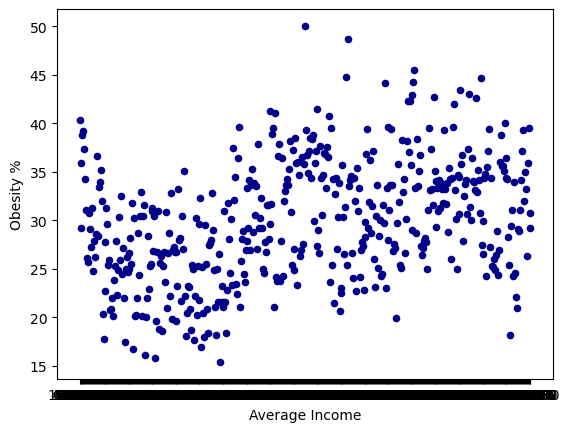

In [98]:
# Quick plot to look at all cities
ax1 = merged_df.plot.scatter(x='Average Income',
                      y='Obesity %',
                      c='DarkBlue')

In [99]:
#need to plot a map
import hvplot.pandas

In [ ]:
# plot map of all income and obesity 